<a href="https://colab.research.google.com/github/sbb2002/Portfolio/blob/main/.study/Tensorflow/ML_ch5_logistic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# **Logistic (regression) classification**

## Review



*   Hypothesis:
> $ H(x) = WX $
*   Cost:
> $ cost_(W) = \frac{1}{m} \sum \left(WX-y \right)^2 $
* Learning rate:
> cost의 기울기
* Gradient descent:
> $ W := W-\alpha \frac{\partial}{\partial W} cost_(W) $

## Binary classification

0, 1 encoding 을 통해서 예/아니오, 좋다/싫다 등으로 나눈다.

> **:>** 조와용 오홍홍  = 1 \
**:<** 싫워요 우웨엙  = 0

X에 대한 H(X) 그래프에서 y=0.5 이상(초과)인 경우는 1이라고 예측하는 것이 binary classification의 골자이다.

그런데 기존의 H(X)는 애매해서 그냥 쓰기가 힘들다. 

왜냐하면 다음과 같은 상황이 벌어질 수 있기 때문이다..

---

AI 의사센세가 환자에게 암 진단을 맡겼는데, 그는 이렇게 말했다. 

> **" 0.3 정도 그럴수도 있고 0.7 정도 아닐수도 있습니다. "**

환자 왈,

>  **" 기면 기고 아니면 아니다라고 딱 말해줘. 그래야 약을 먹던가 말던가 하지. "**

---

그래서 함수를 고쳐서 g(z)=sigmoid 꼴의 함수로 만들어 쓴다. z=WX, H(x)=g(z) 로 치환하면 아래와 같은 식이 된다.

> $ g_(z) = \frac{1}{1+e^{-z}} $

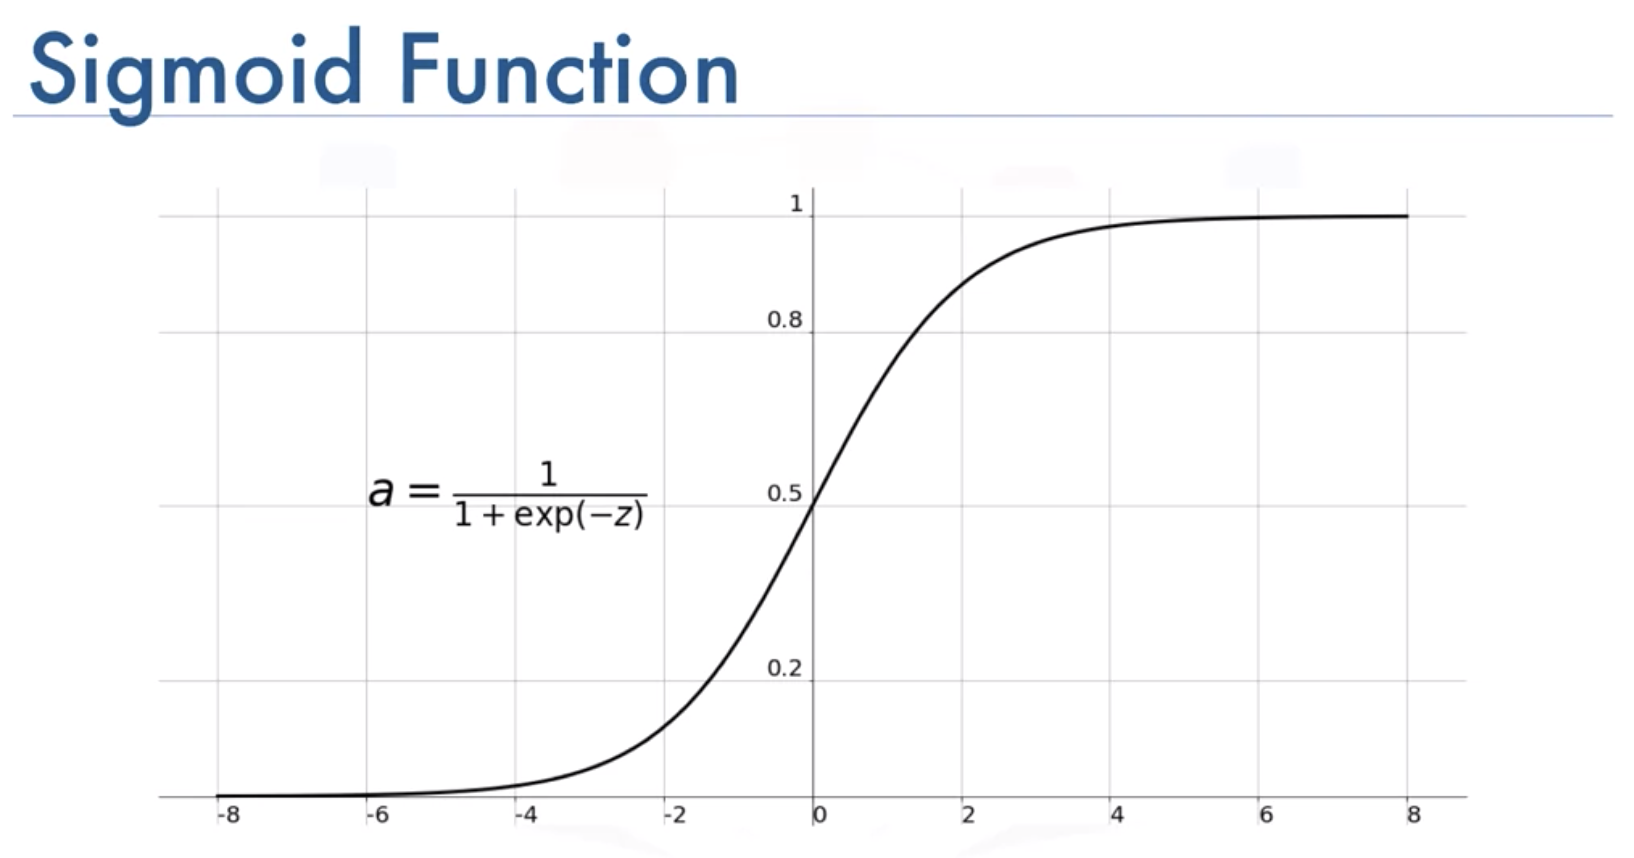

그래프 모양처럼 0~1 사이값이 잘 나오지않도록, 0 아니면 1로만 나오게끔 한 것이다.

이처럼 Hypothesis를 sigmoid 형태로 바꾼 것을 Logistic hypothesis 라고 한다. 

이를 활용해 Logistic classification을 할 수 있다.

* Logistic hypothesis:
> $ H(X) = \frac{1}{ 1+e^{-W^{T} X} } $

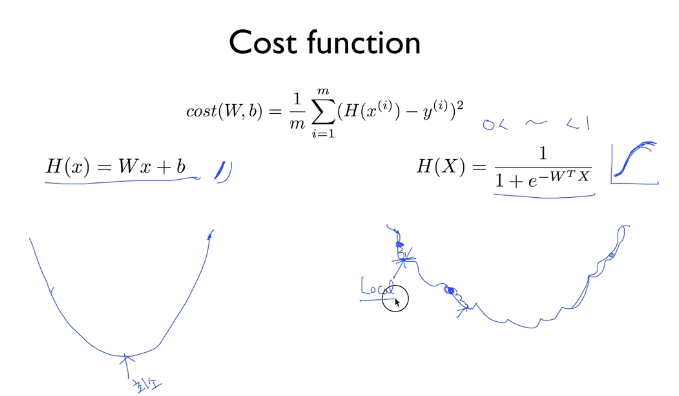

기존의 H(x)을 대입한 cost는 극소값이 하나있는 **밥그릇 모양**이지만,

logistic H(x)를 대입한 cost는 **울퉁불퉁한 밥그릇모양**이다.

exponential 때문에 두 가지 특성이 생긴 것이다.

> 극소가 되는 지점이 여러개 (local minimum) \
극소이면서도 최소값인 지점이 하나 (global minimum)

우리가 노리는 건 global minimum이기에 기존의 cost함수를 그대로 써선 안된다. 

예측기가 local minimum에 안주(?)할 수 있기 때문이다.

그래서 exp에 카운터격인 log를 넣어 새로 cost함수를 고안한다.

* New cost function for logistic: 
> $\begin{align}
\text{c}(H(x),y) = \left\{
\begin{array}{cl}
\text{-logH(x)} & \text{; y=1} \\
\text{-log(1-H(x))} & \text{; y=0}
\end{array}
\right.
\end{align}$




---


**이 식을 예를 들어 사용해보자.** 

어느 된장 회사가 자사의 청국장에 대한 설문조사를 했다.

> '좋아'라고 판단한 데이터는 y=1 \
 '별로'라고 판단한 데이터는 y=0


**그럼 '좋다'고 정의한 데이터, y=1에 대한 경우를 살펴보자.**

때마침 우리의 예측기 H(x)도 1로 똑같이 예측했다고 가정하자.

이 예측기의 cost는 아래와 같다.

> $ c(1) = -log(1) = 0 $

이번엔 반대로, 예측기가 홰까닥 돌아서 틀렸다. 

그 뜻은 'H(x)=0로 예측했다'는 이야기다.

> $ c(0) = -log(0) = \infty $

그럼 자연스럽게 cost를 최소화하는 방향으로 움직이므로 H(x)=1인 예측이 간택될 것이다.

**거꾸로 '싫어'라고 정의한 데이터, y=0의 경우도 보자.**

마찬가지로 잘 예측해내서 H(x)=0을 가진다고 치자.

그럼 그 cost는 아래와 같다.

> $ c(0) = -log(1-0) = 0 $

한편, 이번에도 어쩌다 어김없이 실수했다. H(x)=1.

> $ c(1) = -log(1-1) = \infty $

역시 cost가 최소화되는 쪽인 H(x)=0이 선택해질 것이다.

이와 같은 원리로 binary classification에서도 cost함수를 쓰기 쉽게 최적화해서 문제없이 잘 예측할 수 있다.




---



## Cost function

cost함수를 정리해보자.

* 기존 cost함수:
> $ cost(W) = \frac{1}{m} \sum \text{c(H(x),y)} $

* binary classification에 맞게 고안된 cost함수(sigmoid):

> $\begin{align}
\text{c}(H(x),y) = 
\left\{
  \begin{array}{cl}
  \text{-log(H(x)} & \text{if y=1} \\
  \text{-log(1-H(x)} & \text{if y=0}
  \end{array}
  \right.
\end{align}$

* 실제 코딩 중에 쓰이는 cost함수:
> $ \text{c}(H(x)) = -ylog(H(x)) - (1-y)log(1-H(x)) $

2nd cost와 3rd cost는 동일하다. 

2nd cost함수는 실제 코딩상황에서는 if 컨디션을 챙기기가 매우 번거롭기 때문에, '수식(formula)' 레벨 선에서 미리 손보아 3rd cost함수를 만든 것이다.

실제 cost함수 코드는 다음과 같다.

In [ ]:
# # cost function for binary classfication
# cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis)))

그리고 minimize 식은 전에 배운대로 같다.

> $ W:= W - \alpha \frac{\partial}{\partial W} cost(W) $

그 코드는 cost 정의 후에 아래와 같이 사용하면 된다.

In [ ]:
# # Minimize
# a = tf.Variable(0.1)    # learning rate, alpha
# optimizer = tf.train.GradientDescentOptimizer(a)
# train = optimizer.minimize(cost)

## Practice1

In [ ]:
# x_data=[[공부시간, 노는시간]], y_data=[[합격여부]]
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([2,1]), name='weight')   # W에게는 tf.random_normal([inputs, outputs])
b = tf.Variable(tf.random_normal([1]), name='bias')       # b에게는 tf.random_normal([outputs])

# Hypothesis using sigmoide: tf.div(1., 1. + tf.exp(tf.matmul(X,W) + b)) 이라고 쓸 수도 있다.
hypothesis = tf.sigmoid(tf.matmul(X,W) + b)

# cost function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [ ]:
# Accuracy computation
# True if hypothesis > 0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)                         # 매 예측에 대해 T/F 여부
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))    # 전체 예측에 대해 T/F 정확도

In [ ]:
# Launch graph
with tf.Session() as sess:
  # Initialize Tensorflow variables
  sess.run(tf.global_variables_initializer())

  for step in range(10001):
    cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
      print(step, cost_val)

  # Accuracy report
  h, c, a = sess.run([hypothesis, predicted, accuracy],
                     feed_dict={X: x_data, Y: y_data})
  print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 0.8203743
200 0.5443608
400 0.4628841
600 0.4228734
800 0.39838138
1000 0.3805863
1200 0.36610672
1400 0.35349616
1600 0.34207797
1800 0.33151105
2000 0.32161066
2200 0.31226894
2400 0.30341747
2600 0.29500902
2800 0.28700814
3000 0.27938595
3200 0.27211812
3400 0.26518288
3600 0.2585605
3800 0.25223288
4000 0.2461832
4200 0.24039553
4400 0.23485531
4600 0.22954871
4800 0.22446273
5000 0.21958528
5200 0.21490495
5400 0.21041115
5600 0.20609383
5800 0.20194352
6000 0.1979515
6200 0.1941095
6400 0.19040973
6600 0.18684502
6800 0.1834085
7000 0.18009375
7200 0.17689468
7400 0.17380573
7600 0.17082165
7800 0.16793726
8000 0.16514792
8200 0.16244918
8400 0.15983702
8600 0.15730722
8800 0.15485628
9000 0.15248053
9200 0.15017678
9400 0.14794184
9600 0.14577278
9800 0.14366685
10000 0.14162128

Hypothesis:  [[0.02749887]
 [0.15420783]
 [0.2889588 ]
 [0.78874594]
 [0.94412076]
 [0.98170495]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0



* y_data
> [[0], [0], [0], [1], [1], [1]]

* hypothesis -> correct
> [0.02749887] -> 0,\
[0.15420783] -> 0,\
[0.2889588 ] -> 0,\
[0.78874594] -> 1,\
[0.94412076] -> 1, \
[0.98170495] -> 1

실제(y_data)와 (정확히는 binary처리된) hypothesis는 완전히 일치한다!

따라서 Accuracy: 1.0

**뎡말 잘했읍니다!**

---

## Practice2: Classify diabetes

In [ ]:
import numpy as np

In [ ]:
# Upload csv file: data-03-diabetes.csv
from google.colab import files
files.upload()

Saving data-03-diabetes.csv to data-03-diabetes.csv


{'data-03-diabetes.csv': b'-0.294118,0.487437,0.180328,-0.292929,0,0.00149028,-0.53117,-0.0333333,0\n-0.882353,-0.145729,0.0819672,-0.414141,0,-0.207153,-0.766866,-0.666667,1\n-0.0588235,0.839196,0.0491803,0,0,-0.305514,-0.492741,-0.633333,0\n-0.882353,-0.105528,0.0819672,-0.535354,-0.777778,-0.162444,-0.923997,0,1\n0,0.376884,-0.344262,-0.292929,-0.602837,0.28465,0.887276,-0.6,0\n-0.411765,0.165829,0.213115,0,0,-0.23696,-0.894962,-0.7,1\n-0.647059,-0.21608,-0.180328,-0.353535,-0.791962,-0.0760059,-0.854825,-0.833333,0\n0.176471,0.155779,0,0,0,0.052161,-0.952178,-0.733333,1\n-0.764706,0.979899,0.147541,-0.0909091,0.283688,-0.0909091,-0.931682,0.0666667,0\n-0.0588235,0.256281,0.57377,0,0,0,-0.868488,0.1,0\n-0.529412,0.105528,0.508197,0,0,0.120715,-0.903501,-0.7,1\n0.176471,0.688442,0.213115,0,0,0.132638,-0.608027,-0.566667,0\n0.176471,0.396985,0.311475,0,0,-0.19225,0.163962,0.2,1\n-0.882353,0.899497,-0.0163934,-0.535354,1,-0.102832,-0.726729,0.266667,0\n-0.176471,0.00502513,0,0,0,-0.105

In [ ]:
!ls

data-03-diabetes.csv  sample_data


In [ ]:
xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

num_rows, num_cols = xy.shape
print("Rows: ", num_rows, "\tCols: ", num_cols)
print("가장 끝 col이 y_data이고, 나머지 cols는 x_data임을 기억할 것!")

Rows:  759 	Cols:  9
가장 끝 col이 y_data이고, 나머지 cols는 x_data임을 기억할 것!


In [ ]:
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([8,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X,W) + b)
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [ ]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  feed = {X: x_data, Y: y_data}
  for step in range(10001):
    sess.run(train, feed_dict=feed)
    if step % 200 == 0:
      print(step, sess.run(cost, feed_dict=feed))

    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict=feed)
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.

이 작업은 한 5분 소요된 것 같다.

Accuracy:  0.7799736

---

이제 이 정도면 꽤 몇가지 예시를 직접 다룰 수 있게 되었다.

두가지 quest를 진행해보자.

* CSV reading using tf.decode_csv
 * if using tf V2.4.1 ,
 > tf.io.decode_csv( \
     records,\
     record_defaults, \
     field_delim=',', \
     use_quote_delim=True, \
     na_value='', \
     select_cols=None, \
     name=None
)

* Try other classification data from Kaggle

## Practice3: Kaggle